<a href="https://colab.research.google.com/github/Muhammadsulton1/MIPT_Data_analys/blob/main/%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%81%D1%82%D0%B0%D1%82_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
n = 25 #размер выборки
mean = 3075 #в граммах
std = 500 #в граммах
alpha = 0.05
H0 = 2800 #нулевая гипотеза что средний вес детей равен 3074
a0 = H0

Критерий T-Стюдента
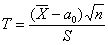

In [ ]:
t_obs = (mean - a0)*np.sqrt(n)/std                     # наблюдаемое значение статистики
t_crit = sts.t(n - 1).ppf(1 - alpha)   # критическое значение статистики

if t_obs > t_crit:
  print(f'Наблюдаемое значение {t_obs:.4} больше критического {t_crit:.4} \
      => нулевая гипотеза отвергается')
else:
   print(f'Наблюдаемое значение {t_obs:.4} меньше критического {t_crit:.4} \
      => нулевая гипотеза не отвергается')

Наблюдаемое значение 2.75 больше критического 1.711       => нулевая гипотеза отвергается


нулевая гипотеза, т.е. название программы неэффективна

Упражнение 2
т.к интенсивность будем брать распределение пуассона

In [ ]:
k = 3 # 3 аврии в год
alpha = 0.05
coals = pd.read_csv('coals.csv')

In [ ]:
coals.head()

,year,count
0,1851,4
1,1852,5
2,1853,4
3,1854,1
4,1855,0


нулевая гипотеза , что в среднем аварий <=3

альтернативнаяч гипотеза, что аварий > 3 в год

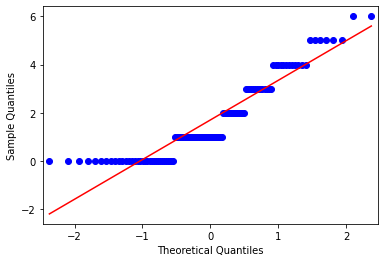

In [ ]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(coals['count'], line='s');

Как видно графику у нас распределение совсем ненормальное поэтому будем применять ассимптотический метод

In [ ]:
mean = coals['count'].mean()
std = coals['count'].std(ddof=1) / np.sqrt(coals.shape[0])

alpha = 0.05

In [ ]:
def asy_mean_test(mean_hat, std_hat, mu_0=0,
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """

    z_obs = (mean_hat - mu_0)/std_hat

    if alternative == 'two-sided':
        p_value = 2 * (1 - sts.norm().cdf(np.abs(z_obs)))
        z_crit = sts.norm().ppf(1 - alpha/2)

        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'),
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))

    if alternative == 'less':
        p_value = sts.norm().cdf(z_obs)
        z_crit = sts.norm().ppf(1 - alpha)

        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - sts.norm().cdf(z_obs)
        z_crit = sts.norm().ppf(1 - alpha)

        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))


    plt.figure(figsize = (10, 5))
    x = np.linspace(-margin, margin)
    pdf = sts.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]

    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]

        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin,
                 h*y_max, round(statistic, 2), color=color, fontsize=16)

        xq = np.linspace(left_bound, right_bound)
        yq = sts.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)

    print(f'p-value = {p_value:.3}')
    return p_value

p-value = 0.0


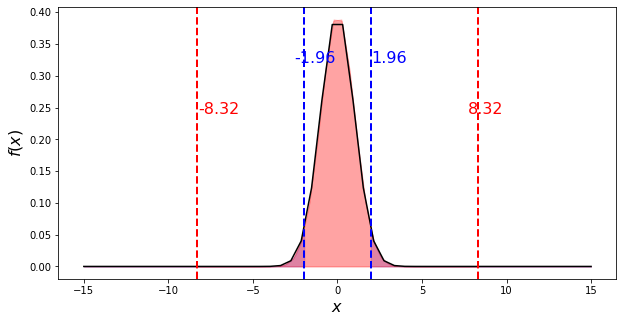

In [ ]:
asy_mean_test(mean, std, mu_0 = 3, alpha = 0.05,
              margin = 15, alternative='two-sided');

In [ ]:
from statsmodels.stats.weightstats import ztest

z_obs, p_val = ztest(coals['count'], value=3, alternative='two-sided')

print(f"Наблюдаемое значение: {z_obs:.7}")
print(f"P-значение: {p_val:.7}")

Наблюдаемое значение: -8.316444
P-значение: 9.064211e-17


нулевая гипотеза  отвергается, т.е. среднем аварий в год больше 3х

упражнение 3

In [ ]:
from google.colab import files
files.upload()

Saving seattle.csv to seattle.csv


{'seattle.csv': b'Price\tYear\r\n142\t2002\n232\t2002\n132.5\t2002\n200\t2002\n362\t2002\n244.95\t2002\n335\t2002\n324.5\t2002\n222\t2002\n225\t2002\n175\t2002\n50\t2002\n215\t2002\n260\t2002\n307\t2002\n210.95\t2002\n1370\t2002\n215.5\t2002\n179.8\t2002\n217\t2002\n197.5\t2002\n146.5\t2002\n116.7\t2002\n449.9\t2002\n266\t2002\n265\t2002\n256\t2002\n684.5\t2002\n257\t2002\n570\t2002\n149.4\t2002\n155\t2002\n244.9\t2002\n66.407\t2002\n166\t2002\n296\t2002\n148.5\t2002\n270\t2002\n252.95\t2002\n507\t2002\n705\t2002\n1850\t2002\n290\t2002\n164.95\t2002\n375\t2002\n335\t2002\n987.5\t2002\n330\t2002\n149.95\t2002\n190\t2002\r\n419\t2001\r\n55.268\t2001\r\n65\t2001\r\n210\t2001\r\n510.728\t2001\r\n212.2\t2001\r\n152.720\t2001\r\n266.6\t2001\r\n69.427\t2001\r\n125\t2001\r\n191\t2001\r\n451\t2001\r\n469\t2001\r\n310\t2001\r\n325\t2001\r\n50\t2001\r\n675\t2001\r\n140\t2001\r\n105.5\t2001\r\n285\t2001\r\n320\t2001\r\n305\t2001\r\n255\t2001\r\n95.179\t2001\r\n346\t2001\r\n199\t2001\r\n450\t2001\r

In [ ]:
data = pd.read_csv('seattle.csv',sep='\t')
data.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [ ]:
d_2001 = data[data['Year'] == 2001]['Price']
d_2002 = data[data['Year'] == 2002]['Price']

проверим распределение на нормальность

In [ ]:
sts.kstest(x, 'norm', args=(data['Price'].mean(), data['Price'].std(ddof=1)))

KstestResult(statistic=0.8867039455195809, pvalue=3.1078500324849104e-142)

т.к. распределение ненормальное воспользуемся асимптотическим критерием

In [ ]:
d_2001.mean(),d_2002.mean()

(288.92654000000005, 329.25714)

In [ ]:
alpha = 0.05                                                    # уровень значимости = 5%
nx, ny = d_2002.size, d_2001.size                                   # размер выборок

diff = d_2002.mean() - d_2001.mean()                                # разность средних
diff_std = np.sqrt(d_2002.var(ddof=1)/nx + d_2001.var(ddof=1)/ny)   # стандартное отклонение

z_obs = diff/diff_std                                           # наблюдаемое значение
z_crit = sts.norm.ppf(1 - alpha)                              # критическое значение

if z_obs > z_crit:
   print(f'Наблюдаемое значение {z_obs:.4} больше критического {z_crit:.4} \
      => нулевая гипотеза отвергается')
else:
   print(f'Наблюдаемое значение {z_obs:.4} меньше критического {z_crit:.4} \
      => нулевая гипотеза не отвергается')

Наблюдаемое значение 0.8057 меньше критического 1.645       => нулевая гипотеза не отвергается


Упражнение 4 (у нас зависимые выборки)

In [ ]:
from google.colab import files
files.upload()

Saving ADHD.csv to ADHD.csv


{'ADHD.csv': b'D0 D60\r\n57 62\r\n27 49\r\n32 30\r\n31 34\r\n34 38\r\n38 36\r\n71 77\r\n33 51\r\n34 45\r\n53 42\r\n36 43\r\n42 57\r\n26 36\r\n52 58\r\n36 35\r\n55 60\r\n36 33\r\n42 49\r\n36 33\r\n54 59\r\n34 35\r\n29 37\r\n33 45\r\n33 29\r\n'}

In [ ]:
df = pd.read_csv('ADHD.csv',sep=' ')
df.head()

,D0,D60
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


нулевая гипотеза:  таблетки не помогли и результаты не улучшились

альтернативная гипотеза:таблетки помогли и результаты стали лучше

In [ ]:
k_1 = df['D0']
k_2 = df['D60']

In [ ]:
mean_x = k_1.mean()
mean_y = k_2.mean()
mean_x,mean_y

(39.75, 44.708333333333336)

In [ ]:
k_1.var(ddof=1), k_2.var(ddof=1)

(128.02173913043478, 151.78079710144925)

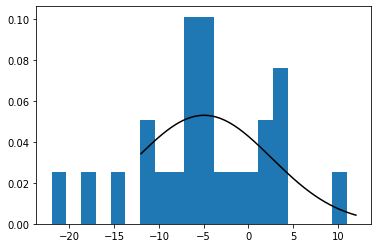

In [ ]:
d = k_1 - k_2
d_mean = d.mean()
d_std = d.std(ddof=1)

plt.hist(d, bins=20, density=True)

xs = np.linspace(-12, 12, 300)
ys = sts.norm(loc=d_mean, scale=d_std).pdf(xs)
plt.plot(xs, ys, color="black");

т.к. распределение имеет очень малое количество наблюдений предположим, что распределение у нас нормальное и будем использовать критерий Т-Стьюдента

In [ ]:
alpha = 0.05                                                    # уровень значимости = 5%
d = df['D0'] - df['D60']
sts.ttest_1samp(d, 0)

Ttest_1sampResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

In [ ]:
# тест для зависимых выборок
sts.ttest_rel(k_1, k_2)

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

Ответ: нулевая гипотеза отвергается

Упражнение 5 т.к. у нас очень маленькая выборка предположим что данные распределенны нормально и проверим гипотезу об отношении дисперсий

нулевая гипотеза: дисперсия прыжков в 1м и 2м случае одинакова а также присутсвие Анны влияет на результат

альтернативная гипотеза: дисперсия прыжков для 1 и 2го различна присутсвие Анны не влияет на результат

In [ ]:
data_df = pd.DataFrame()

In [ ]:
data_df['first'] = [1.83, 1.64, 2.27, 1.78, 1.89, 2.33, 1.61, 2.31]
data_df['second'] = [2.05, 1.07, 1.59, 1.96, 1.29, 1.52, 1.18, 1.47]

In [ ]:
ec = data_df['first']
ae = data_df['second']

ec.mean(), ae.mean()

(1.9575, 1.51625)

In [ ]:
ec.var(ddof = 1), ae.var(ddof = 1)

(0.09065000000000002, 0.12182678571428567)

In [ ]:
alpha = 0.05
nx, ny = ec.shape[0], ae.shape[0]

F_obs = ec.var(ddof = 1)/ae.var(ddof = 1)  # наблюдаемое значение

f_rv = sts.f(nx - 1, ny - 1)
F_crit = f_rv.ppf(1 - alpha)           # критическое значение

print(f'Наблюдаемое значение {F_obs:.5} меньше критического {F_crit:.5} \
      => нулевая гипотеза не отвергается')

Наблюдаемое значение 0.74409 больше критического 3.787       => нулевая гипотеза отвергается


нулевая гипотеза отвергается, т.е. дисперсия прыжков для 1-2го дня различаются и отсутсвие анны влияет на результат